In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## LOAD ALL THE LIBRARIES AND DATASET
https://www.kaggle.com/datasets/rtatman/glove-global-vectors-for-word-representation

In [5]:
import spacy
import json

from sklearn.feature_extraction.text import CountVectorizer

In [9]:
df = pd.read_json("/kaggle/input/dataset-json/news_dataset.json")

print(df.shape)

df.head()

(12695, 2)


,text,category
0,Watching Schrödinger's Cat Die University of C...,SCIENCE
1,WATCH: Freaky Vortex Opens Up In Flooded Lake,SCIENCE
2,Entrepreneurs Today Don't Need a Big Budget to...,BUSINESS
3,These Roads Could Recharge Your Electric Car A...,BUSINESS
4,Civilian 'Guard' Fires Gun While 'Protecting' ...,CRIME


In [12]:
df.category.value_counts()

# You can see it is not ditributed, well we don't actually need that here, hhehehe

category
BUSINESS    4254
SPORTS      4167
CRIME       2893
SCIENCE     1381
Name: count, dtype: int64

In [16]:
# To handlt the imbalance, we are doing undersampling

min_samples = 1381 # we have these many SCIENCE articles and SCIENCE is our minority class


df_business = df[df.category=="BUSINESS"].sample(min_samples, random_state=42)
df_sports = df[df.category=="SPORTS"].sample(min_samples, random_state=42)
df_crime = df[df.category=="CRIME"].sample(min_samples, random_state=42)
df_science = df[df.category=="SCIENCE"].sample(min_samples, random_state=42)

In [17]:
df_balanced = pd.concat([df_business,df_sports,df_crime,df_science],axis=0)
df_balanced.category.value_counts()

# As you can see the dataset is balanced now

category
BUSINESS    1381
SPORTS      1381
CRIME       1381
SCIENCE     1381
Name: count, dtype: int64

In [22]:
target = {'BUSINESS': 0, 'SPORTS': 1, 'CRIME': 2, 'SCIENCE': 3}

df_balanced['category_num'] = df_balanced['category'].map(target)
df_balanced.sample(10)

,text,category,category_num
2099,"Rio Olympics Closing Ceremony Caps Historic, D...",SPORTS,1
10445,Check Out This Pot-Slinging Catapult Found On ...,CRIME,2
4037,3 Reasons Why The Patriots Might Repeat Belich...,SPORTS,1
10434,'Lost' GoPro Records Stunning Grand Canyon Foo...,SCIENCE,3
8659,The Draymond Green Situation Suddenly Looks A ...,SPORTS,1
3856,The Top 10 Reasons the Economic Recovery Is as...,BUSINESS,0
10734,Fan Dies After Fall From Upper Deck At Atlanta...,SPORTS,1
2423,Paleontologist Talks About Fossil ‘Find Of A L...,SCIENCE,3
8154,"The TPP, Drug Patents, and President Clinton T...",BUSINESS,0
12295,"Rosetta Spacecraft Crash Lands On Comet, Bring...",SCIENCE,3


In [23]:
df_balanced.columns

Index(['text', 'category', 'category_num'], dtype='object')

In [25]:
X = df_balanced['text']
y = df_balanced['category_num']

X.shape, y.shape

((5524,), (5524,))

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

X_train.shape, y_train.shape

((4419,), (4419,))

In [30]:
y_train.value_counts()

category_num
0    1105
3    1105
1    1105
2    1104
Name: count, dtype: int64

In [32]:
y_test.value_counts()

# As you can see, the y data is equally splitted between the samples that is been splitted with train test split

category_num
2    277
0    276
1    276
3    276
Name: count, dtype: int64

In [36]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

clf = Pipeline([
    ('vectorizer_bow', CountVectorizer()),
    ('Multi_NB', MultinomialNB())
])

clf.fit(X_train, y_train)

Pipeline(steps=[('vectorizer_bow', CountVectorizer()),
                ('Multi_NB', MultinomialNB())])

In [39]:
y_pred = clf.predict(X_test)

cr = classification_report(y_test, y_pred)

print(cr)

              precision    recall  f1-score   support

           0       0.78      0.92      0.84       276
           1       0.92      0.85      0.88       276
           2       0.91      0.89      0.90       277
           3       0.89      0.82      0.85       276

    accuracy                           0.87      1105
   macro avg       0.88      0.87      0.87      1105
weighted avg       0.88      0.87      0.87      1105



<Axes: >

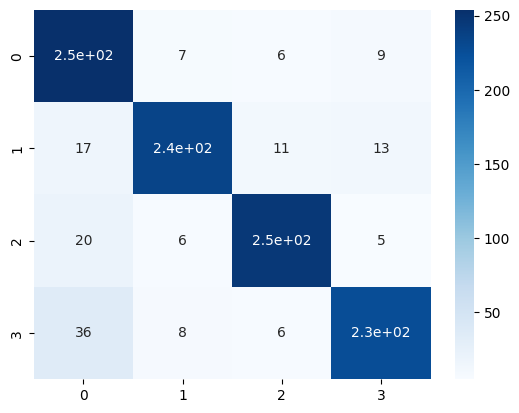

In [46]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, cmap = "Blues", annot = True)

In [48]:
# Doing bi-grams to check

from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

clf = Pipeline([
    ('vectorizer_bow12', CountVectorizer(ngram_range = (1, 2))),
    ('Multi_NB', MultinomialNB())
])

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

cr = classification_report(y_test, y_pred)

print(cr)

              precision    recall  f1-score   support

           0       0.73      0.95      0.82       276
           1       0.92      0.83      0.87       276
           2       0.91      0.88      0.89       277
           3       0.93      0.79      0.85       276

    accuracy                           0.86      1105
   macro avg       0.87      0.86      0.86      1105
weighted avg       0.87      0.86      0.86      1105



In [49]:
# Doing tri-grams to check

from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

clf = Pipeline([
    ('vectorizer_bow13', CountVectorizer(ngram_range = (1, 3))),
    ('Multi_NB', MultinomialNB())
])

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

cr = classification_report(y_test, y_pred)

print(cr)

              precision    recall  f1-score   support

           0       0.71      0.95      0.81       276
           1       0.92      0.80      0.85       276
           2       0.91      0.88      0.89       277
           3       0.92      0.77      0.84       276

    accuracy                           0.85      1105
   macro avg       0.86      0.85      0.85      1105
weighted avg       0.86      0.85      0.85      1105



## Use text pre-processing to remove stop words, punctuations and apply lemmatization

In [50]:
import spacy

nlp = spacy.load("en_core_web_sm")

In [51]:
def preprocess(text):
    doc = nlp(text)

    processed_words = []
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        processed_words.append(token.lemma_)
    return " ".join(processed_words)

In [52]:
df_balanced['preprocessed_txt'] = df_balanced['text'].apply(preprocess) 

In [53]:
df_balanced.head()

,text,category,category_num,preprocessed_txt
594,How to Develop the Next Generation of Innovato...,BUSINESS,0,develop Generation Innovators stop treat way g...
3093,"Madoff Victims' Payout Nears $7.2 Billion, Tru...",BUSINESS,0,Madoff Victims Payout near $ 7.2 billion Trust...
7447,Bay Area Floats 'Sanctuary In Transit Policy' ...,BUSINESS,0,Bay Area Floats Sanctuary Transit Policy prote...
10388,Microsoft Agrees To Acquire LinkedIn For $26.2...,BUSINESS,0,Microsoft agree acquire linkedin $ 26.2 billio...
1782,"Inside A Legal, Multibillion Dollar Weed Market",BUSINESS,0,inside Legal Multibillion Dollar Weed Market


In [55]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_balanced['preprocessed_txt'], df_balanced['category_num'], test_size = 0.2, random_state = 42, stratify = df_balanced['category_num'])

X_train.shape, y_train.shape

((4419,), (4419,))

In [56]:
#1. create a pipeline object
clf = Pipeline([
    ('vectorizer_bow', CountVectorizer(ngram_range = (1, 2))),        #using the ngram_range parameter 
    ('Multi NB', MultinomialNB())
])

#2. fit with X_train and y_train
clf.fit(X_train, y_train)


#3. get the predictions for X_test and store it in y_pred
y_pred = clf.predict(X_test)


#4. print the classfication report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87       276
           1       0.92      0.87      0.89       276
           2       0.88      0.94      0.91       277
           3       0.93      0.82      0.87       276

    accuracy                           0.89      1105
   macro avg       0.89      0.89      0.89      1105
weighted avg       0.89      0.89      0.89      1105



In [57]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[252,  10,   5,   9],
       [ 11, 240,  18,   7],
       [ 10,   4, 261,   2],
       [ 30,   8,  11, 227]])

Text(95.72222222222221, 0.5, 'Truth')

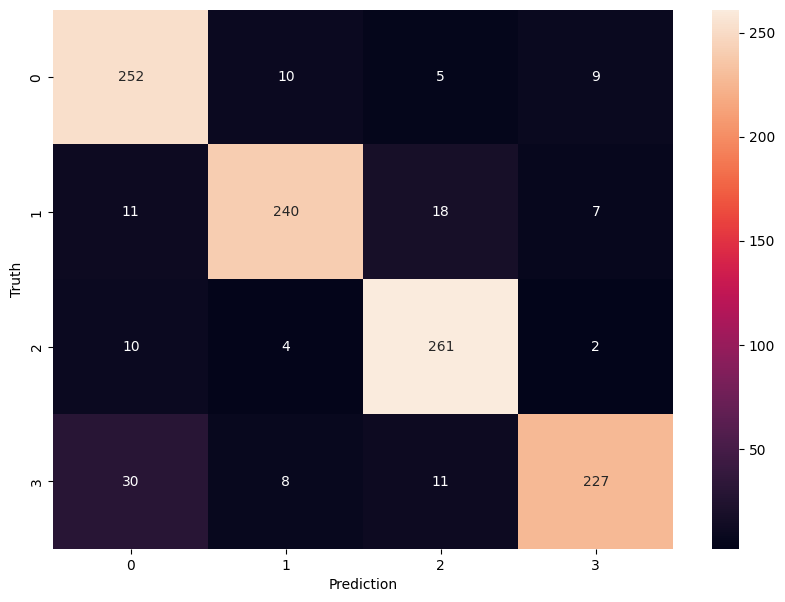

In [58]:
from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')